In [1]:
external_path = 'path/to/data'

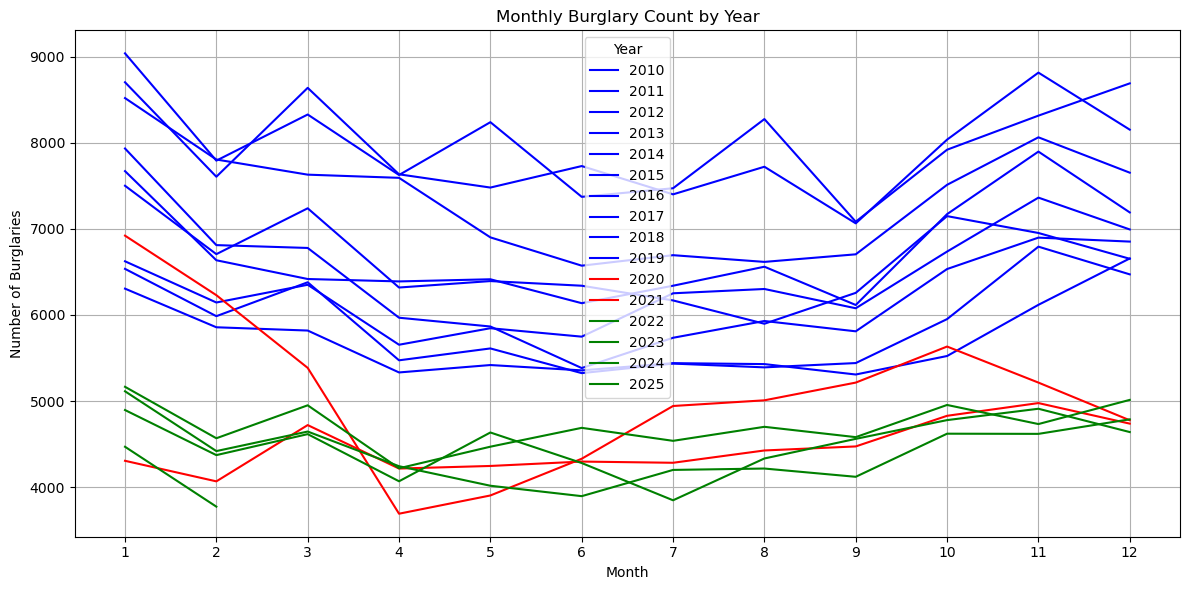

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

data_folder = external_path
burglary_data = []

for subfolder in os.listdir(data_folder):
    subfolder_path = os.path.join(data_folder, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if os.path.isfile(os.path.join(subfolder_path, filename)) and 'street' in filename.lower():
                file_path = os.path.join(subfolder_path, filename)
                
                try:
                    df = pd.read_csv(file_path)
                    if 'Crime type' in df.columns and 'Month' in df.columns:
                        df = df[df['Crime type'].str.lower() == 'burglary']
                        burglary_data.append(df[['Month']])
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

all_burglary_df = pd.concat(burglary_data, ignore_index=True)

all_burglary_df['Month'] = pd.to_datetime(all_burglary_df['Month'], errors='coerce')
all_burglary_df['Year'] = all_burglary_df['Month'].dt.year
all_burglary_df['MonthOnly'] = all_burglary_df['Month'].dt.month

monthly_counts = all_burglary_df.groupby(['Year', 'MonthOnly']).size().reset_index(name='Burglary Count')

pivot_df = monthly_counts.pivot(index='MonthOnly', columns='Year', values='Burglary Count')

plt.figure(figsize=(12, 6))

for year in pivot_df.columns:
    color = 'red' if year in [2020, 2021] else 'green' if year in [2022, 2023, 2024, 2025] else 'blue'
    plt.plot(pivot_df.index, pivot_df[year], label=str(year), color=color)

plt.title('Monthly Burglary Count by Year')
plt.xlabel('Month')
plt.ylabel('Number of Burglaries')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


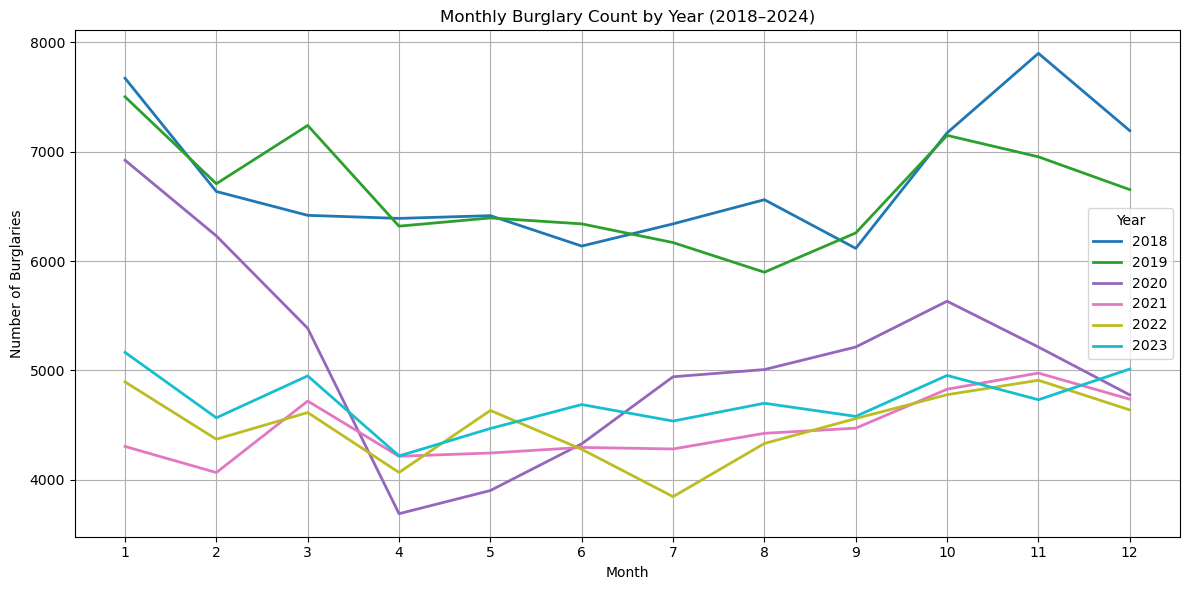

In [10]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

years_to_plot = list(range(2018, 2024))
filtered_df = pivot_df[years_to_plot]

colors = cm.get_cmap('tab10', len(years_to_plot))

plt.figure(figsize=(12, 6))

for idx, year in enumerate(years_to_plot):
    plt.plot(filtered_df.index, filtered_df[year], label=str(year), color=colors(idx), linewidth=2)

plt.title('Monthly Burglary Count by Year (2018–2024)')
plt.xlabel('Month')
plt.ylabel('Number of Burglaries')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


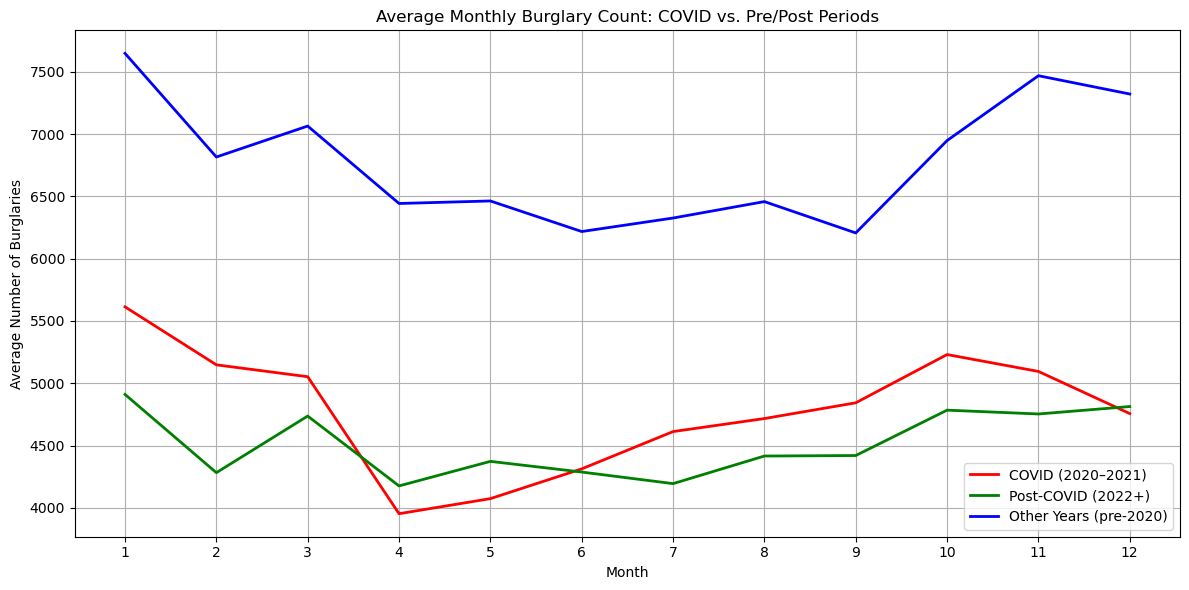

In [8]:
import matplotlib.pyplot as plt

def classify_period(year):
    if year in [2020, 2021]:
        return 'COVID (2020–2021)'
    elif year >= 2022:
        return 'Post-COVID (2022+)'
    else:
        return 'Other Years'

monthly_counts['Period'] = monthly_counts['Year'].apply(classify_period)

average_burglaries = (
    monthly_counts
    .groupby(['Period', 'MonthOnly'])['Burglary Count']
    .mean()
    .reset_index()
)

pivot_avg = average_burglaries.pivot(index='MonthOnly', columns='Period', values='Burglary Count')

plt.figure(figsize=(12, 6))

if 'COVID (2020–2021)' in pivot_avg.columns:
    plt.plot(pivot_avg.index, pivot_avg['COVID (2020–2021)'], label='COVID (2020–2021)', color='red', linewidth=2)

if 'Post-COVID (2022+)' in pivot_avg.columns:
    plt.plot(pivot_avg.index, pivot_avg['Post-COVID (2022+)'], label='Post-COVID (2022+)', color='green', linewidth=2)

if 'Other Years' in pivot_avg.columns:
    plt.plot(pivot_avg.index, pivot_avg['Other Years'], label='Other Years (pre-2020)', color='blue', linewidth=2)

plt.title('Average Monthly Burglary Count: COVID vs. Pre/Post Periods')
plt.xlabel('Month')
plt.ylabel('Average Number of Burglaries')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

